In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
import scipy.cluster.hierarchy as ch
from scipy.stats import pearsonr
# Set style and Color
cmap2 = cm.get_cmap('twilight',13)
colors1= []
for i in range(cmap2.N):
    rgb= cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))
    #print(rgb2hex(rgb))
# Set style
sns.set(style='whitegrid')

### Load the data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/thunderstroke325/60-Days-of-Data-Science-and-ML/main/datasets/customer_data.csv',low_memory = False)

# Display Customer Data 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

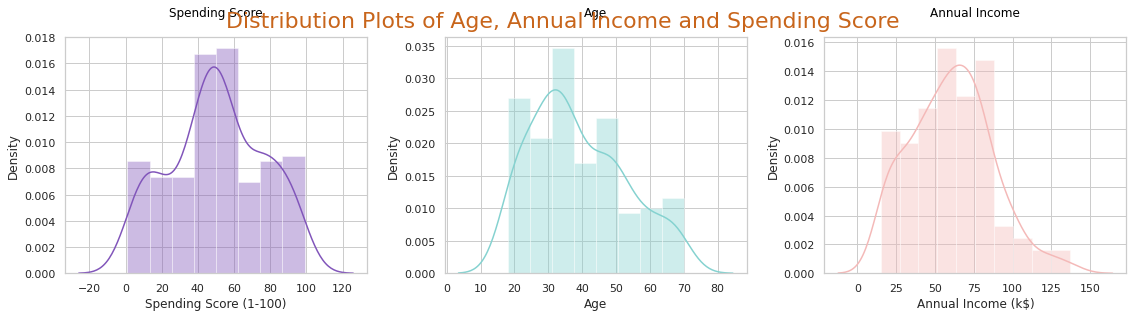

In [3]:
# Distribution Plots
plt.figure(figsize=(16,12))
# Spending Score
plt.subplot(3,3,1)
plt.title('Spending Score\n', color='black')
sns.distplot(df['Spending Score (1-100)'], color='#8155BA')
# Annual Income 
plt.subplot(3,3,3)
plt.title('Annual Income\n', color='black')
sns.distplot(df['Annual Income (k$)'], color='#F4B9B8')
# Age
plt.subplot(3,3,2)
plt.title('Age\n', color='black')
sns.distplot(df['Age'], color='#85D2D0')
plt.suptitle(' Distribution Plots of Age, Annual Income and Spending Score \n', color='#C8651B', size = 22)
plt.tight_layout()

plt.show()

In [4]:
# Label Encoding : To covert categorical variable to Numeric Variable
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df['Gender'] = l.fit_transform(df.iloc[:,0])
# Standardization 
x = df.iloc[:,0:].values 
sc = StandardScaler()
X = sc.fit_transform(x)
# Principal Component Analysis 
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(X)

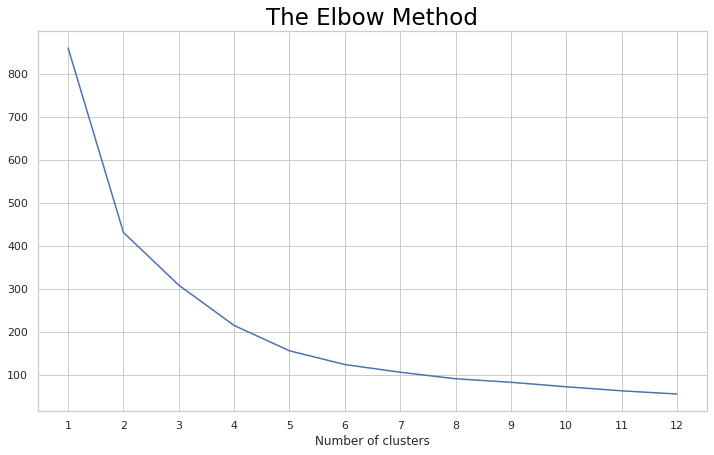

In [5]:
# Find the optimum number for the cluster
from sklearn.cluster import KMeans
l1 = []
for i in range(1,13):
    k_c = KMeans(n_clusters = i, init ='k-means++', random_state=42)
    k_c.fit(X_pca)
    l1.append(k_c.inertia_)
plt.figure(figsize=(12,7))
plt.plot(range(1, 13), l1)
plt.title('The Elbow Method', color='black',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,13))

plt.show()

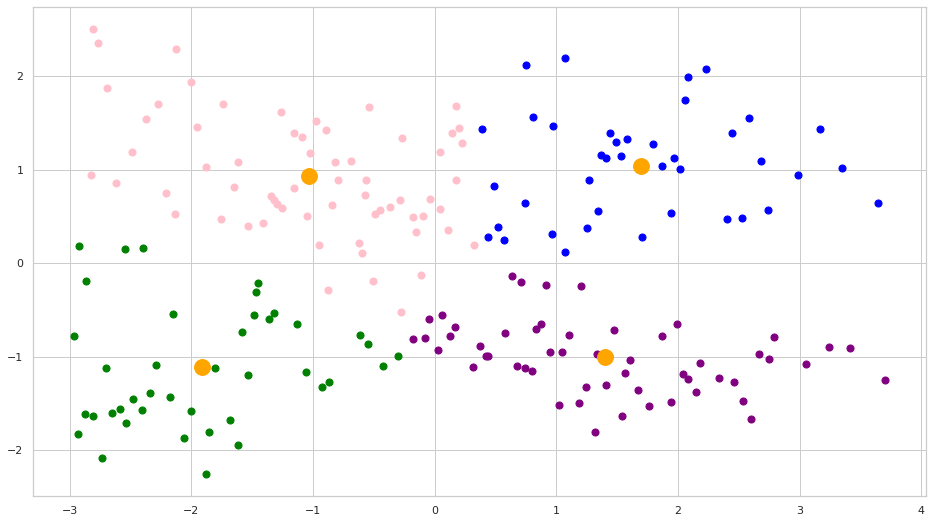

In [6]:
# With 4 clusters
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=42,max_iter=300,n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)
plt.figure(1 , figsize = (16 ,9))
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s = 50, c = 'blue', label = 'Cluster1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s = 50, c = 'green', label = 'Cluster2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s = 50, c = 'pink', label = 'Cluster3')
plt.scatter(X_pca[y_kmeans == 3, 0], X_pca[y_kmeans == 3, 1], s = 50, c = 'purple', label = 'Cluster4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'orange', label = 'Centroids')

plt.show()

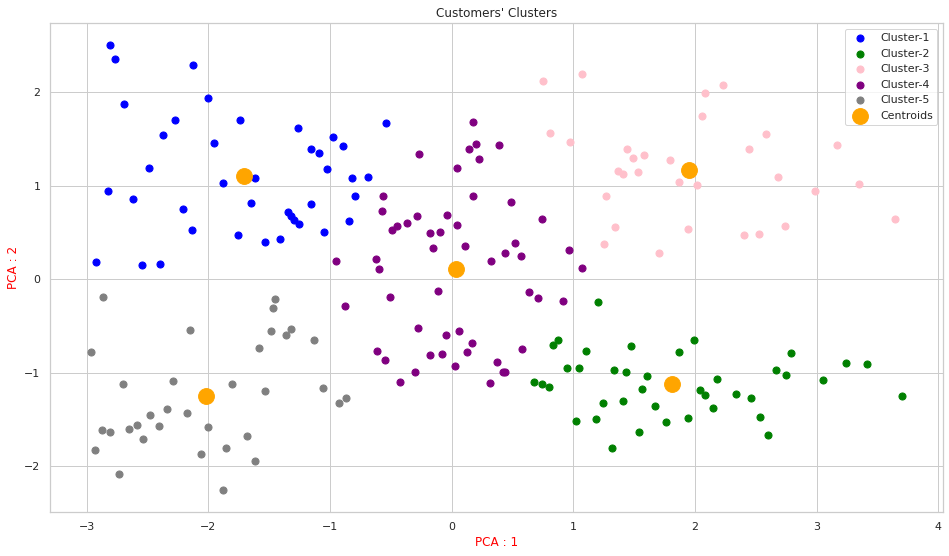

In [7]:
# With 5 Clusters
kmeans = KMeans(n_clusters = 5, init ='k-means++', random_state=42,max_iter=300,n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)
plt.figure(1 , figsize = (16 ,9))
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s = 50, c = 'blue', label = 'Cluster-1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s = 50, c = 'green', label = 'Cluster-2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s = 50, c = 'pink', label = 'Cluster-3')
plt.scatter(X_pca[y_kmeans == 3, 0], X_pca[y_kmeans == 3, 1], s = 50, c = 'purple', label = 'Cluster-4')
plt.scatter(X_pca[y_kmeans == 4, 0], X_pca[y_kmeans == 4, 1], s = 50, c = 'grey', label = 'Cluster-5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'orange', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('PCA : 1', color='red')
plt.ylabel('PCA : 2', color='red')
plt.legend()

plt.show()

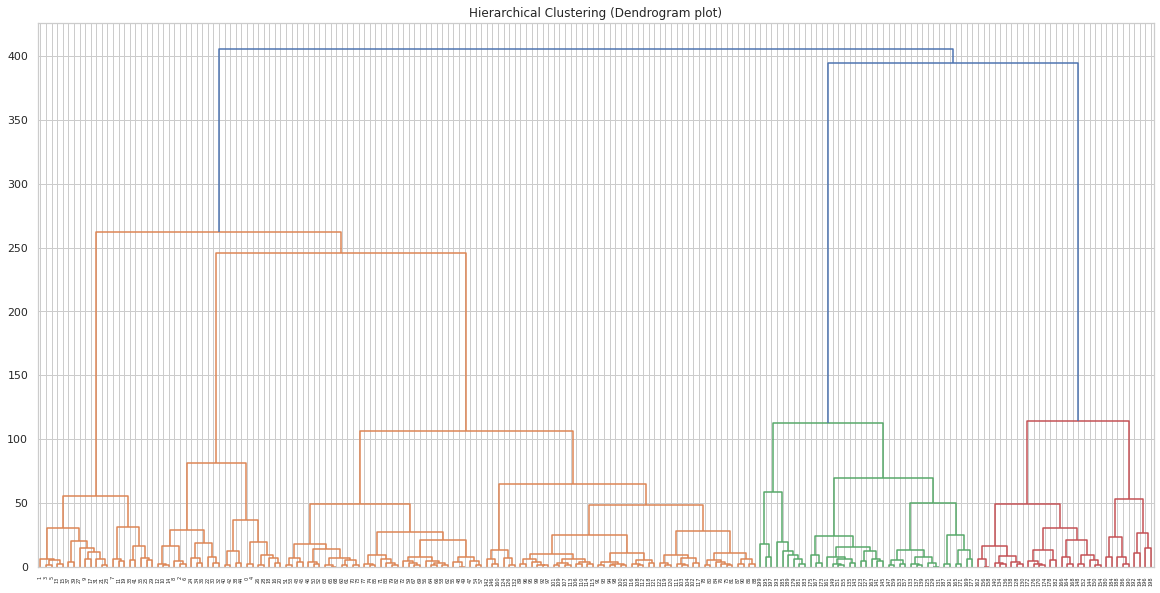

In [8]:
# Hierarchical Clustering ( Dendogram)
X=df.iloc[:, [3,4]].values
plt.figure(figsize=(20,10))
dendrogram=ch.dendrogram(ch.linkage(X,method = 'ward'))
plt.title('Hierarchical Clustering (Dendrogram plot)')

plt.show()

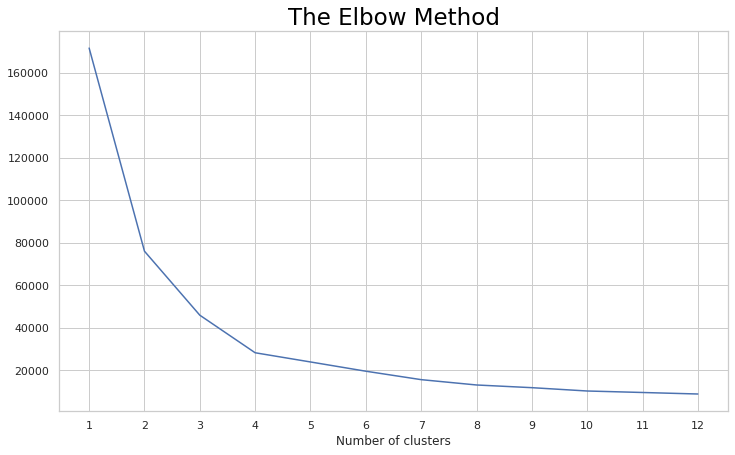

In [10]:
# Segmentation using Age and Spending Score
df_one = df[['Age','Spending Score (1-100)']].iloc[:,:].values
l2=[]
for i in range(1,13):
    kas = (KMeans(n_clusters = i ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42 ) )
    kas.fit(df_one)
    l2.append(kas.inertia_)

# Optimum Clusters
plt.figure(figsize=(12,7))
plt.plot(range(1, 13), l2)
plt.title('The Elbow Method', color='black',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,13))
plt.show()

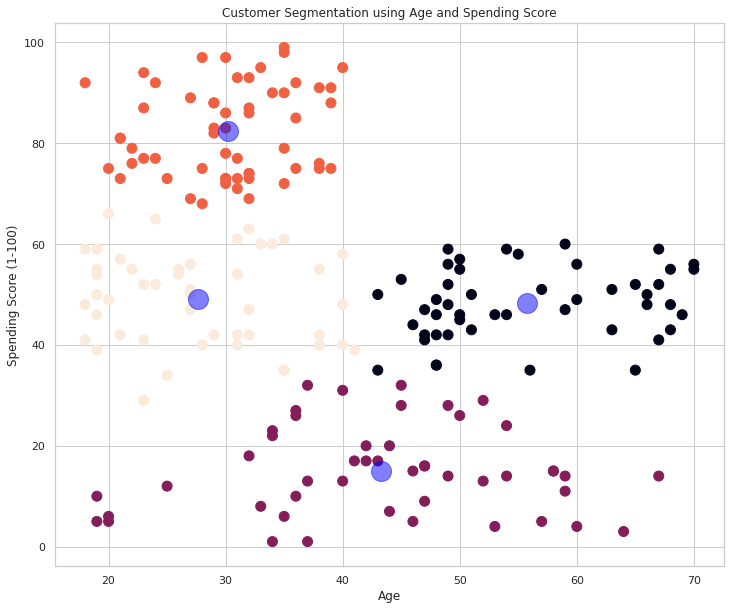

In [11]:
a = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                         random_state= 42 ) )
a.fit(df_one)
l = a.labels_
cn = a.cluster_centers_
# plot
plt.figure(figsize=(12,10))
plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = l , 
            s = 100 )
plt.scatter(x = cn[: , 0] , y =  cn[: , 1] , s = 400 , c = 'blue' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.title('Customer Segmentation using Age and Spending Score')

plt.show()

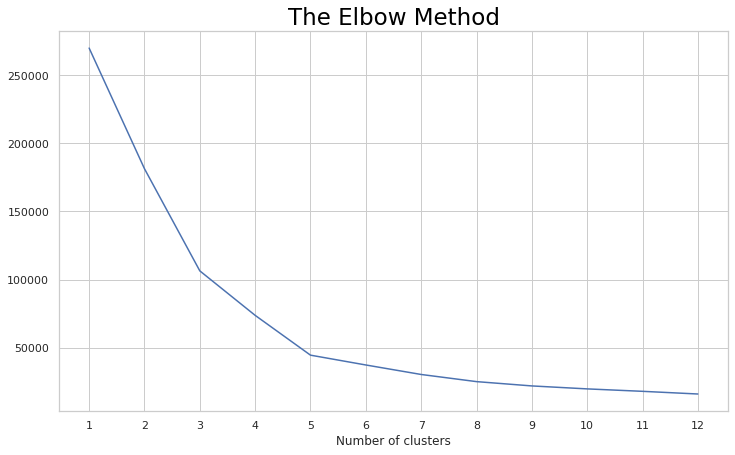

In [12]:
# Segmentation using Annual Income and Spending Score
df_two = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
l3 = []
for i in range(1 , 13):
    kis = (KMeans(n_clusters = i ,init='k-means++', n_init = 10 ,max_iter=300, 
                          random_state= 42) )
    kis.fit(df_two)
    l3.append(kis.inertia_)
plt.figure(figsize=(12,7))
plt.plot(range(1, 13), l3)
plt.title('The Elbow Method', color='black',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,13))

plt.show()

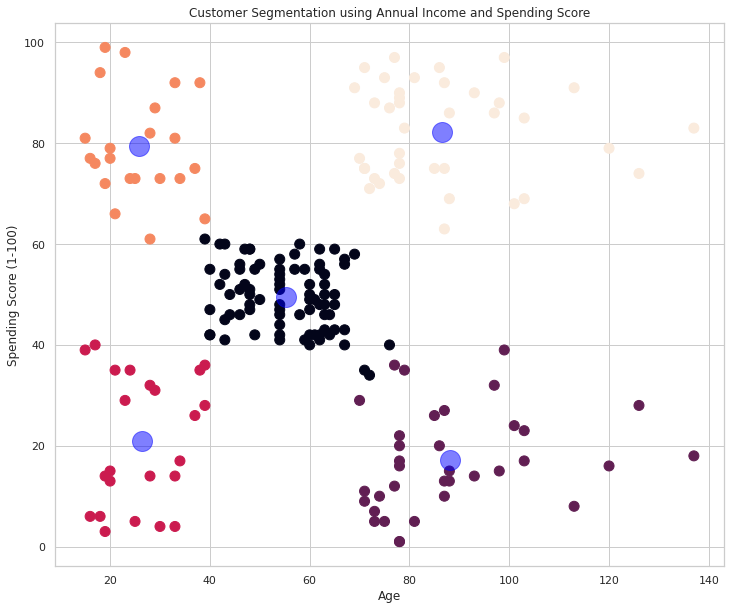

In [13]:
asi = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                         random_state= 42 ) )
asi.fit(df_two)
l_one = asi.labels_
cn_one = asi.cluster_centers_
# plot
plt.figure(figsize=(12,10))
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = l_one , 
            s = 100 )
plt.scatter(x = cn_one[: , 0] , y =  cn_one[: , 1] , s = 400 , c = 'blue' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.title('Customer Segmentation using Annual Income and Spending Score')

plt.show()

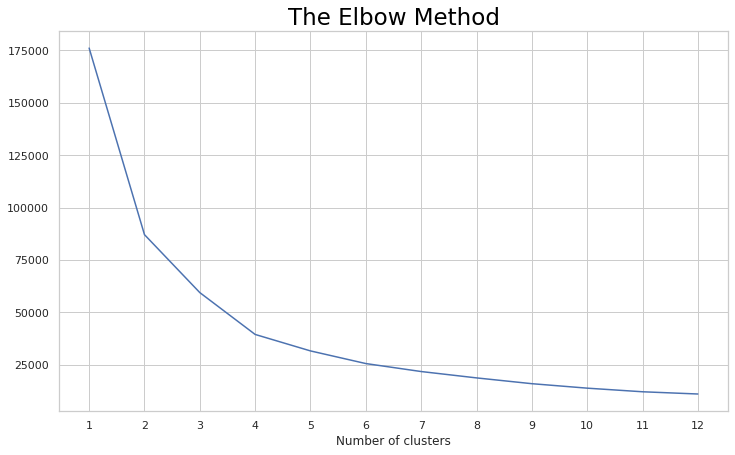

In [14]:
# Customer Segmentation using Age and Annual Income
df_three = df[['Age','Annual Income (k$)' ]].iloc[: , :].values
l4 = []
for i in range(1 , 13):
    kaa = (KMeans(n_clusters = i ,init='k-means++', n_init = 10 ,max_iter=300, 
                          random_state= 42) )
    kaa.fit(df_three)
    l4.append(kaa.inertia_)
# Plot 
plt.figure(figsize=(12,7))
plt.plot(range(1, 13), l4)
plt.title('The Elbow Method', color='black',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,13))

plt.show()

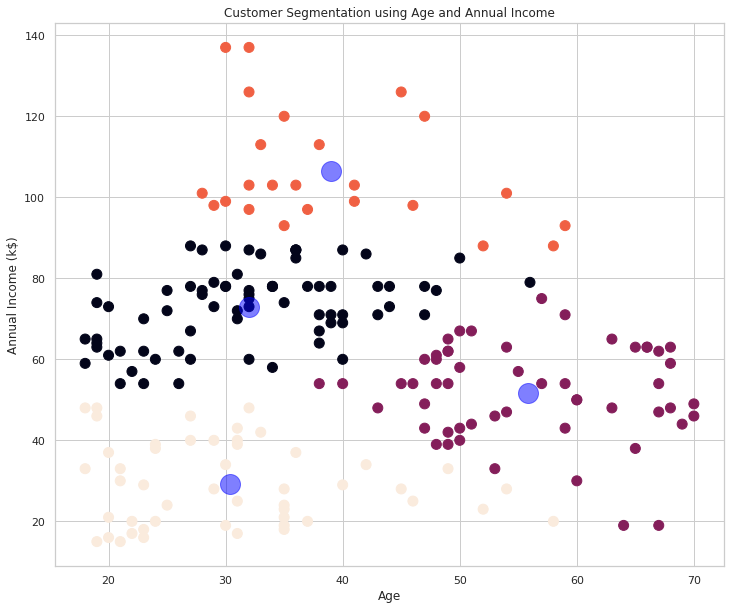

In [15]:
aa = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                         random_state= 42 ) )
aa.fit(df_three)
l_two = aa.labels_
cn_two = aa.cluster_centers_
# plot
plt.figure(figsize=(12,10))
plt.scatter( x = 'Age' ,y = 'Annual Income (k$)' , data = df , c = l_two , 
            s = 100 )
plt.scatter(x = cn_two[: , 0] , y =  cn_two[: , 1] , s = 400 , c = 'blue' , alpha = 0.5)
plt.ylabel('Annual Income (k$)') , plt.xlabel('Age')
plt.title('Customer Segmentation using Age and Annual Income')

plt.show()